# Health Care Fraud Detection 

## Part I. Exploratory Data Analysis 

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

from datetime import datetime

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


In [2]:
#df_ip = pd.read_pickle("./df_ip.pkl")
#df_op = pd.read_pickle("./df_op.pkl")

In [3]:
df_ip = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

df_op = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

df_p = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')

flags = pd.read_csv('Train-1542865627584.csv')


In [4]:
df_ip_test = pd.read_csv('Test_Inpatientdata-1542969243754.csv')

df_op_test = pd.read_csv('Test_Outpatientdata-1542969243754.csv')

df_p_test = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')

test = pd.read_csv('Test-1542969243754.csv')

In [5]:
df_ip_flags = pd.merge(df_ip, flags, on = 'Provider')
df_op_flags = pd.merge(df_op, flags, on = 'Provider')

In [6]:
df_ip_providers = df_ip_flags.groupby('Provider')

df_op_providers = df_op_flags.groupby('Provider')

In [7]:
df_ip_flags['Provider'].nunique()

2092

In [8]:
df_op_flags['Provider'].nunique()

5012

In [9]:
df_ip_flags['ip_op'] = 1
df_op_flags['ip_op'] = 0

From each of these dataframes, we make two separate dataframes, each containing only providers with or without potential fraud flag, respectively.

In [10]:
df_ip_fraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'Yes']
df_op_fraud = df_op_flags[df_op_flags['PotentialFraud'] == 'Yes']
df_ip_nfraud = df_ip_flags[df_ip_flags['PotentialFraud'] == 'No']
df_op_nfraud = df_op_flags[df_op_flags['PotentialFraud'] == 'No']

In [11]:
df_ip_fraud['Provider'].nunique()

440

In [12]:
df_ip_nfraud['Provider'].nunique()

1652

In [13]:
df_op_fraud['Provider'].nunique()

462

In [14]:
df_op_nfraud['Provider'].nunique()

4550

In [15]:
df_flags = flags.copy()

In [16]:
fraud = df_flags[df_flags['PotentialFraud'] == 'Yes']
nfraud = df_flags[df_flags['PotentialFraud'] == 'No']

In [17]:
fraud.shape

(506, 2)

In [18]:
nfraud.shape

(4904, 2)

In [19]:
df_fraud = pd.concat([df_ip_fraud, df_op_fraud])
df_nfraud = pd.concat([df_ip_nfraud, df_op_nfraud])

In [20]:
df_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,ip_op
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes,1
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes,1
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes,1
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes,1


In [21]:
df_fraud['Provider'].nunique()

506

In [22]:
df_nfraud['Provider'].nunique()

4904

## States

In [23]:
df_loc_fraud = pd.merge(df_fraud, df_p, on = 'BeneID')

df_loc_nfraud = pd.merge(df_nfraud, df_p, on = 'BeneID')

In [24]:
fraud_states = df_loc_fraud['State'].unique()
print (sorted(fraud_states))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54]


In [25]:
nfraud_states = df_loc_nfraud['State'].unique()
print (sorted(nfraud_states))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54]


In [26]:
df_loc_nfraud['State'].mode()

0    45
dtype: int64

In [27]:
df_loc_fraud['County'].nunique()

271

In [28]:
df_loc_nfraud['County'].nunique()

311

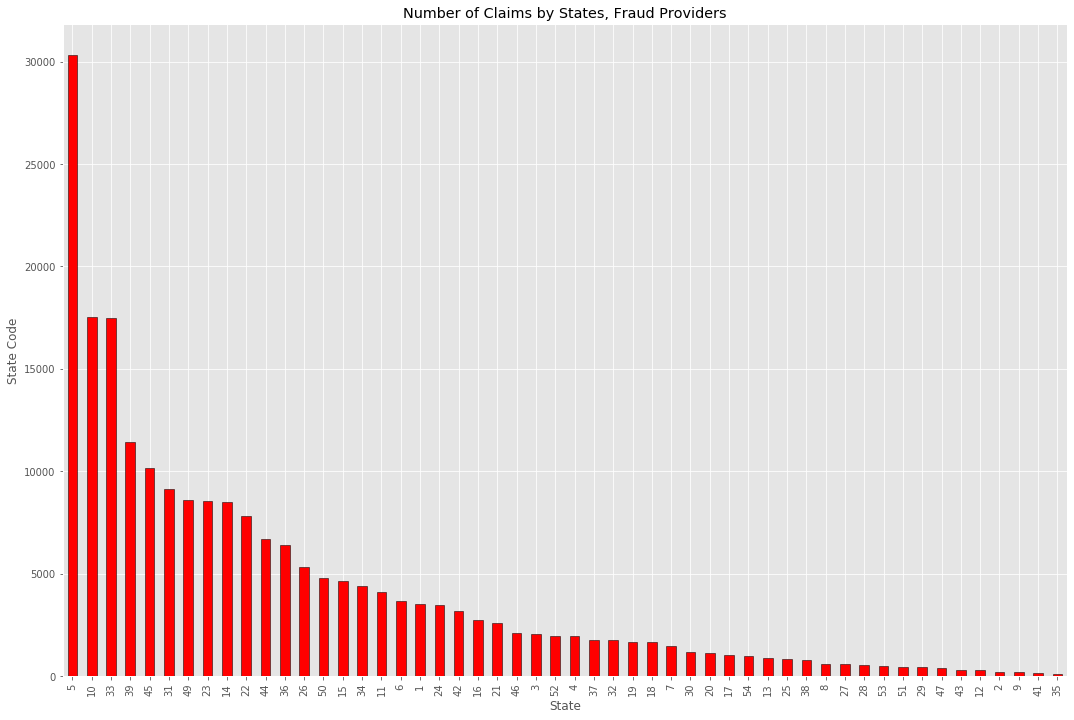

In [29]:
fig = plt.figure(figsize=(18,12))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, Fraud Providers')
plt.show()

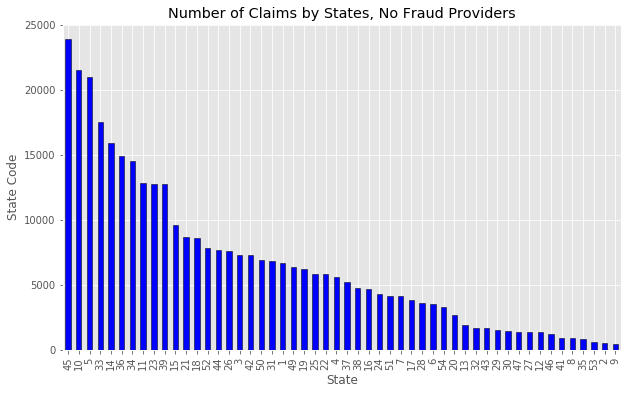

In [30]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Number of Claims by States, No Fraud Providers')
plt.show()

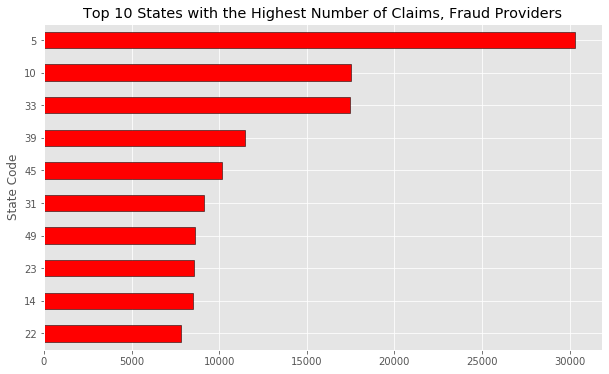

In [31]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, Fraud Providers')
plt.show()

State Codes:
* 05 - California
* 10 - Florida
* 33 - New York
* 39 - Pennsylvania
* 45 - Texas
* 31 - New Jersey
* 49 - Virginia
* 23 - Michigan
* 14 - Illinois
* 22 - Massachusetts

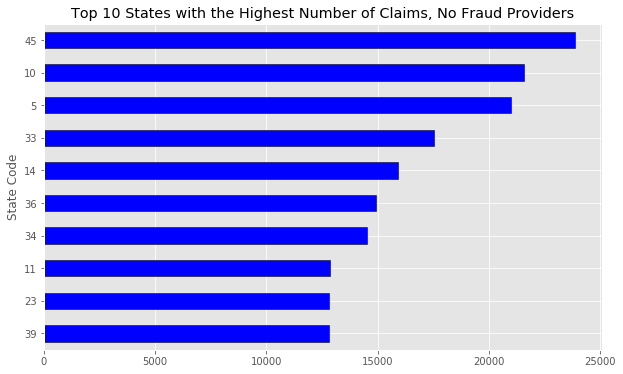

In [32]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Highest Number of Claims, No Fraud Providers')
plt.show()

State Codes:
* 45 - Texas
* 10 - Florida
* 5  - California
* 33 - New York
* 14 - Illinois
* 36 - Ohio
* 34 - Oklahoma
* 11 - Georgia
* 23 - Michigan
* 39 - Pennsylvania
    

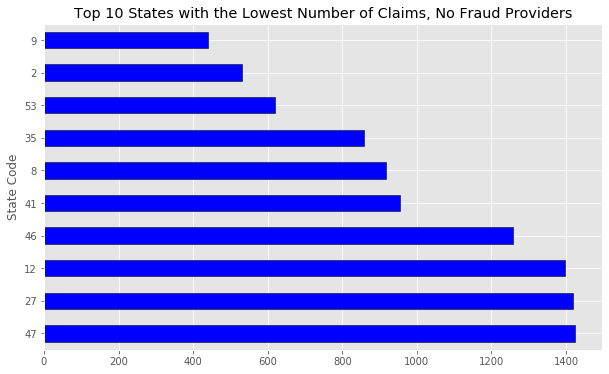

In [33]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('State')['ClaimID'].count().sort_values(ascending = False).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('State Code')
plt.title('Top 10 States with the Lowest Number of Claims, No Fraud Providers')
plt.show()

State Codes
* 9 - District of Columbia
* 2 - Alaska
* 53 - Wyoming
* 35 - North Dakota
* 8 - Delaware
* 41 - Rhode Island
* 46 - Utah
* 12 - Hawaii
* 27 - Montana
* 47 - Vermont


## Counties 

In [34]:
#fig = plt.figure(figsize=(18,12))
#df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'r', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, Fraud Providers')
#plt.show()

In [35]:
#fig = plt.figure(figsize=(10,6))
#df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = False).plot(kind = 'bar',facecolor = 'b', edgecolor = 'k')

#plt.ylabel('County Code')
#plt.title('Number of Claims by Counties, No Fraud Providers')
#plt.show()

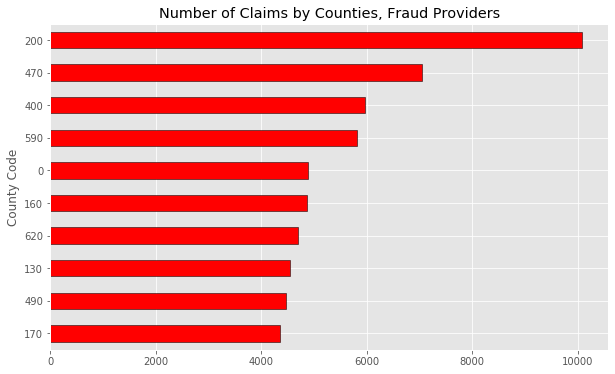

In [36]:
fig = plt.figure(figsize=(10,6))
df_loc_fraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'r', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, Fraud Providers')
plt.show()

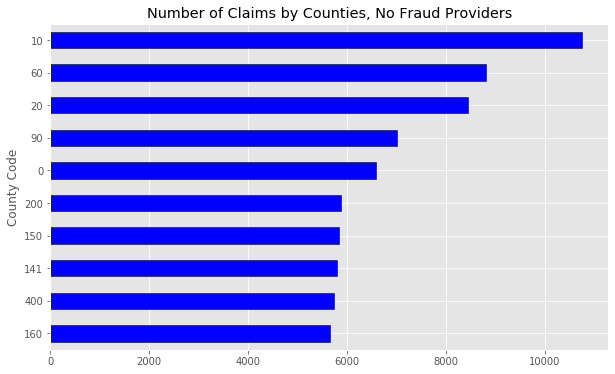

In [37]:
fig = plt.figure(figsize=(10,6))
df_loc_nfraud.groupby('County')['ClaimID'].count().sort_values(ascending = True).tail(10).plot(kind = 'barh',facecolor = 'b', edgecolor = 'k')

plt.ylabel('County Code')
plt.title('Number of Claims by Counties, No Fraud Providers')
plt.show()